# Mushroom classification 🍄

In this project, we will use a public dataset from kaggle.com, the “Mushroom Classification” dataset, and try to figure out if a mushroom is edible or not. This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. Each species is identified as edible or poisonous. When it comes to mushrooms, there is no simple rule for determining the edibility.

We will tackle this classification problem using logistic regression, ridge classifier, decision tree, Naive Bayes, and neural networks. After comparing the results of each model, we will find out the best performing one. 


Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


## Importing the required libraries

As always we’ll start with importing the required libraries.

📌 Use the keywords "import" and "from".

In [2]:
# Import Pandas and Matplotlib
import pandas as pd

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Classification Report function
from sklearn.metrics import classification_report


## Dataset and preprocessing

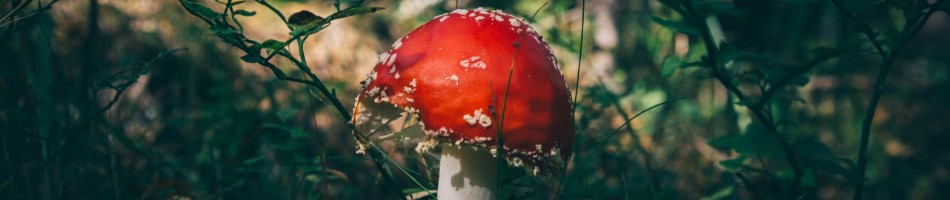

The dataset includes data from 8124 mushrooms. Each of  these mushroom samples have 22 features and they are categorized as edible or poisonous.

### Read the data

Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [3]:
# Read the "mushroom.csv" file
df = pd.read_csv("/content/mushrooms.csv")

###Visualize the data
Then, take a look at the dataset using *data.head()* function.

In [4]:
# Use the head() function to display the first 5 rows of the data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Now, to have a better understanding of the dataset, we can utilize some visualization techniques. For example, by creating a bar graph, we can compare the different classes.

We’ll start with finding the number of samples per class.

📌 Use the value_counts() method.

In [7]:
# Use value_counts method on "class" column of data object
classes = df["class"].value_counts()
classes

# Print the result
# you can see 3916 poisonous and 4208 edible mushrooms

e    4208
p    3916
Name: class, dtype: int64

In [8]:
df["class"].value_counts(normalize=True)
# %52 edible

e    0.517971
p    0.482029
Name: class, dtype: float64

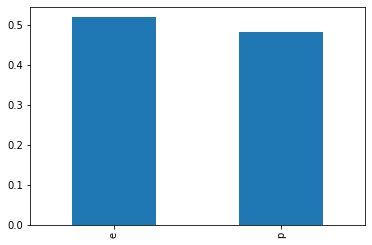

In [9]:
df["class"].value_counts(normalize=True).plot.bar();

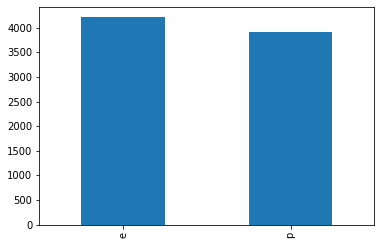

In [10]:
df["class"].value_counts().plot.bar();

In [11]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


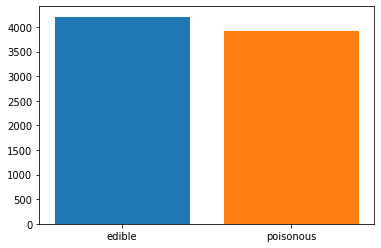

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Add the bar for edible class

plt.bar("edible", classes["e"])
# Add the bar for poisonous class

plt.bar("poisonous", classes["p"])
# Print the plot
plt.show();

### Features and labels
Great, we have a better understanding of our data. Now we’ll divide it into features and corresponding labels. 

In our case we’ll use the columns “cap-shape”, “cap-color”, “ring-number” and “ring-type” as features.

📌 Use the .loc() method to create X and y datasets.

In [13]:
# Create the X variable for features
X = df.loc[:, [ "cap-shape","cap-color", "ring-number", "ring-type"]]

# Create the y variable for output labels
y = df.loc[:, "class"]

In [14]:
X.head()

,cap-shape,cap-color,ring-number,ring-type
0,x,n,o,p
1,x,y,o,p
2,b,w,o,p
3,x,w,o,p
4,x,g,o,e


In [15]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [16]:
X.shape,y.shape

((8124, 4), (8124,))

###Converting the values 

The values are in string format. We need to convert them to integer values to be able to perform mathematical operations with them. We’ll use label encoding for this.

📌 Since the X-data has multiple columns, do this in a for loop so that you can update all columns at once.

📌 For the y data, use the encoder directly.

In [17]:
# Create an LabelEncoder object
le = LabelEncoder()

# Encode the features to integers inside a for loop
for i in X.columns:
  X[i] = le.fit_transform(X[i])

# Encode the ouput labels to integers
y = le.fit_transform(y)

Let’s print both X and y to see the final data.

In [18]:
#Print X
print(X)

      cap-shape  cap-color  ring-number  ring-type
0             5          4            1          4
1             5          9            1          4
2             0          8            1          4
3             5          8            1          4
4             5          3            1          0
...         ...        ...          ...        ...
8119          3          4            1          4
8120          5          4            1          4
8121          2          4            1          4
8122          3          4            1          0
8123          5          4            1          4

[8124 rows x 4 columns]


In [19]:
#Print y
print(y)

[1 0 0 ... 0 1 0]


### Split the data
Finally, we can split our data into training and test datasets.

📌 Use the train_test_split function from sklearn.

In [20]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Creating and training models

Our data is ready to be used! Let’s move on to training on comparing our models.

We use the models we have imported already.

📌 Use the relevant class names to create models.

In [21]:
# Create an object using the LogisticRegression() class
lr = LogisticRegression()

# Create an object using the RidgeClassifier() class
rc = RidgeClassifier()

# Create an object using the DecisionTreeClassifier() class
dtc = DecisionTreeClassifier()

# Create an object using the GaussianNB() class
gnb = GaussianNB()

# Create an object using the MLPClassifier() class
mlp = MLPClassifier()

Then, we train all models with the X_train and y_train dataset we created.

📌 Train all models using .fit() method of each object.

In [22]:
# Train the Logistic Classifier model
lr.fit(X_train, y_train)

# Train the Ridge Classifier model
rc.fit(X_train, y_train)

# Train the Decision Tree model
dtc.fit(X_train, y_train)
# Train the Naive Bayes model
gnb.fit(X_train, y_train)

# Train the Neural Network model
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

Using the X_test set we make predictions with each model and save results to corresponding variables.

📌 Use the .predict() method on each model

In [23]:
# Make prediction using the test dataset on Logistic Classifier model
lr_pred = lr.predict(X_test)

# Make prediction using the test dataset on Ridge Classifier model
rc_pred = rc.predict(X_test)

# Make prediction using the test dataset on Decision Tree model
dtc_pred = dtc.predict(X_test)

# Make prediction using the test dataset on Naive Bayes model
gnb_pred = gnb.predict(X_test)

# Make prediction using the test dataset on Neural Network model
mlp_pred = mlp.predict(X_test)

##Comparing the performances

Instead of calculating precision, recall, f-1 score and accuracy separately we can create a report to compare the performances.

📌 classification_report() function is the one you have to use.

📌 Print the results of all models.

In [24]:
# Create a Classification Report for Logistic Classifier model
lr_report = classification_report(y_test, lr_pred)

# Create a Classification Report for Ridge Classifier model
rc_report = classification_report(y_test, rc_pred)

# Create a Classification Report for Decision Tree model
dtc_report = classification_report(y_test, dtc_pred)

# Create a Classification Report for Naive Bayes model
gnb_report = classification_report(y_test, gnb_pred)

# Create a Classification Report for Neural Network model
mlp_report = classification_report(y_test, mlp_pred)

In [25]:
# Print the report of the Logistic Regression model
print("*****LOGISTIC REGRESSION*****")
print(lr_report)

# Print the report of the Ridge Regression model
print("*****RIDGE REGRESSION*****")
print(rc_report)

# Print the report of the Decision Tree model
print("*****DESICION TREE *****")
print(dtc_report)

# Print the report of the Naive Bayes model
print("*****NAIVE BAYES *****")
print(gnb_report)

# Print the report of the Neural Network model
print("*****NEURAL NETWORK*****")
print(mlp_report)

*****LOGISTIC REGRESSION*****
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1268
           1       0.76      0.80      0.78      1170

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

*****RIDGE REGRESSION*****
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1268
           1       0.76      0.80      0.78      1170

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

*****DESICION TREE *****
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1268
           1       0.89      0.92      0.90      1170

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90   

### Evaluation 

Decision tree performed best. So maybe we can take things one step further and try the Random Forest algorithm to see if it works better. 

📌 Follow the same steps and print the classification report for Random Forest

In [26]:
# Create Random Forest Classifier object, train it and make predicitons
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [27]:
# Create a classification Report for Random Forest model
rfc_report = classification_report(y_test, rfc_pred)

# Print the classification report
print(rfc_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1268
           1       0.89      0.92      0.90      1170

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438



In [28]:
## We found the best algorithm is Decision Tree and Random Forest 
## But I want to use pycaret to compare  all algorithms.


In [29]:
!pip3 install pycaret 




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [30]:
!pip3 install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [33]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [35]:
dff = df.loc[:, [ "class","cap-shape","cap-color", "ring-number", "ring-type"]]
dff

,class,cap-shape,cap-color,ring-number,ring-type
0,p,x,n,o,p
1,e,x,y,o,p
2,e,b,w,o,p
3,p,x,w,o,p
4,e,x,g,o,e
...,...,...,...,...,...
8119,e,k,n,o,p
8120,e,x,n,o,p
8121,e,f,n,o,p
8122,p,k,n,o,e


In [36]:
# Create an LabelEncoder object
le = LabelEncoder()

# Encode the features to integers inside a for loop
for i in dff.columns:
  dff[i] = le.fit_transform(dff[i])

dff.head()

,class,cap-shape,cap-color,ring-number,ring-type
0,1,5,4,1,4
1,0,5,9,1,4
2,0,0,8,1,4
3,1,5,8,1,4
4,0,5,3,1,0


In [37]:
clf=setup(data=dff,target="class",session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(8124, 5)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  target='class')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 

In [38]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9042,0.9679,0.9195,0.8865,0.9026,0.8083,0.8090,0.584
et,Extra Trees Classifier,0.9042,0.9676,0.9195,0.8865,0.9026,0.8083,0.8090,0.562
xgboost,Extreme Gradient Boosting,0.9040,0.9676,0.9192,0.8864,0.9024,0.8080,0.8086,0.863
lightgbm,Light Gradient Boosting Machine,0.9040,0.9676,0.9192,0.8864,0.9024,0.8080,0.8086,0.161
catboost,CatBoost Classifier,0.9042,0.9675,0.9195,0.8865,0.9026,0.8083,0.8090,2.148
dt,Decision Tree Classifier,0.9040,0.9673,0.9192,0.8864,0.9024,0.8080,0.8086,0.024
gbc,Gradient Boosting Classifier,0.9005,0.9563,0.8729,0.9172,0.8944,0.8004,0.8014,0.279
knn,K Neighbors Classifier,0.9042,0.9522,0.9163,0.8892,0.9024,0.8083,0.8089,0.298
lr,Logistic Regression,0.8378,0.8902,0.8289,0.8349,0.8316,0.6753,0.6757,0.791
ada,Ada Boost Classifier,0.8319,0.8872,0.8282,0.8252,0.8264,0.6634,0.6638,0.192


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1229, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1229, verbose=0,
                       warm_start=False)

In [ ]:
## Thus I confirmed RandomForest Model is the best for us by pycaret too.